In [25]:
# !pip install brewer2mpl

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
# plt.style.use('seaborn-whitegrid')
# sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
# print(sns.__version__)  #> 0.9.0

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:100: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


3.8.4


/lib/python3.12/site-packages/pyodide_kernel/kernel.py:100: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


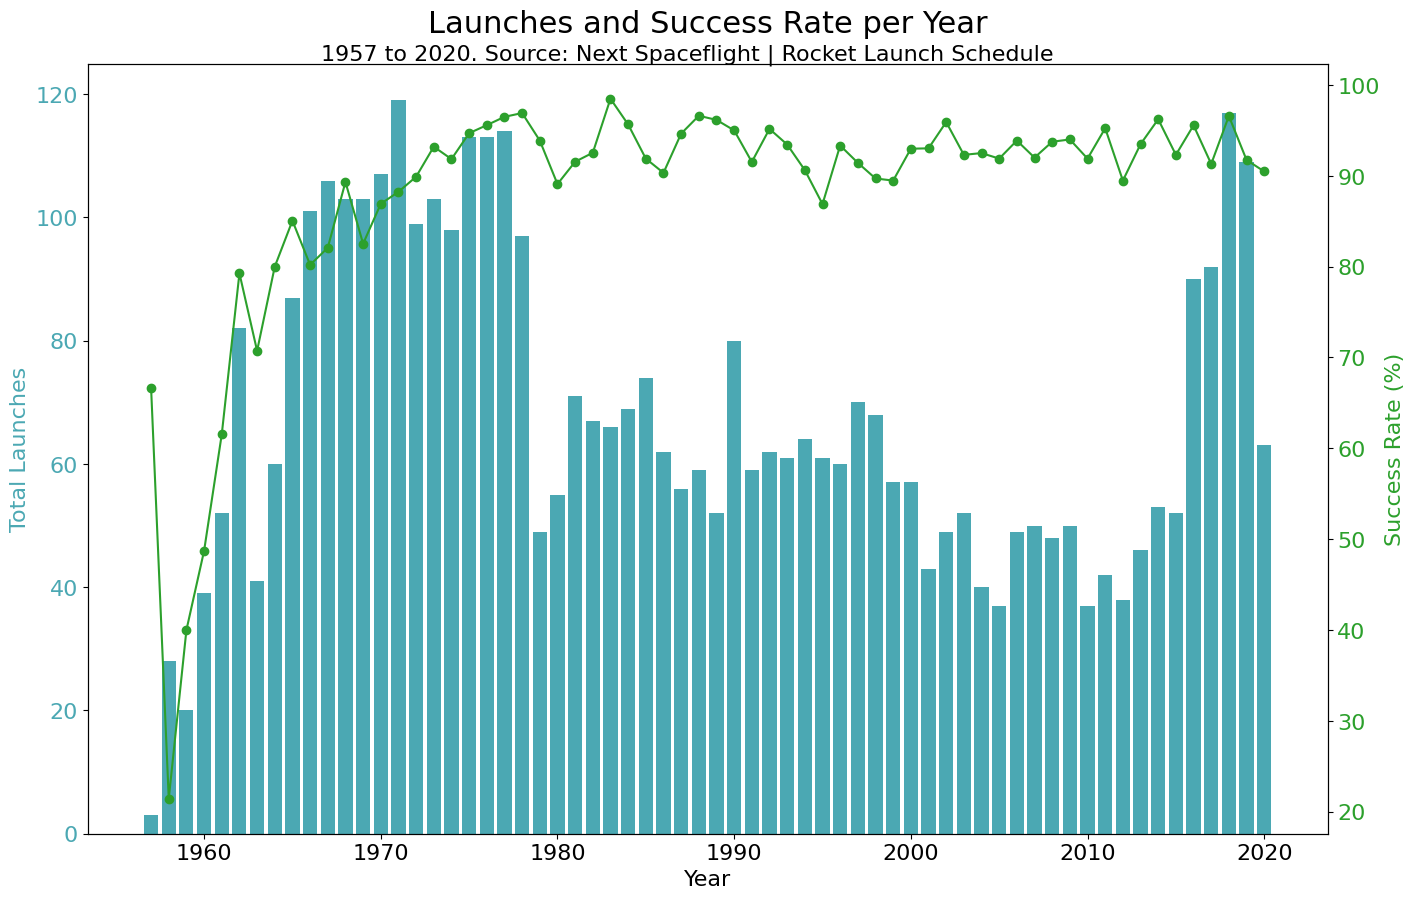

In [45]:
# Import Data
df = pd.read_csv('spaceMissionFrom1957.csv')

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format="%a %b %d, %Y %H:%M %Z")
    except ValueError:
        try:
            return pd.to_datetime(date_str, format="%a %b %d, %Y")
        except ValueError:
            # Handle cases with only time and timezone
            try:
                return pd.to_datetime(date_str, format="%H:%M %Z").tz_localize(None)
            except ValueError:
                return pd.NaT  # Return NaT if all parsing fails

# Apply the parsing function 
df['Datum and Time of Launch'] = df['Datum and Time of Launch'].apply(parse_date)

launch_data = df.groupby('Year').agg(
    total_launches=('Year', 'size'),
    successful_launches=('Status of the mission', lambda x: (x == 'Success').sum())
)

# Calculate success percentage
launch_data['success_rate'] = (launch_data['successful_launches'] / launch_data['total_launches']) * 100

# Create the plot
fig, ax1 = plt.subplots()

# Plot total launches (bars)
ax1.bar(launch_data.index, launch_data['total_launches'], color='#4BA8B3', label='Total Launches')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Launches', color='#4BA8B3')
ax1.tick_params(axis='y', labelcolor='#4BA8B3')

# Create a twin axis for success rate (line)
ax2 = ax1.twinx()
ax2.plot(launch_data.index, launch_data['success_rate'], color='tab:green', marker='o', label='Success Rate (%)')
ax2.set_ylabel('Success Rate (%)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Launches and Success Rate per Year', fontsize=22, y=1.03)
plt.suptitle("1957 to 2020. Source: Next Spaceflight | Rocket Launch Schedule", fontsize=16, y=0.90)  # Add subtitle

# Show the plot
plt.show()

/lib/python3.12/site-packages/pyodide_kernel/kernel.py:100: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  if self.interpreter.should_run_async(code):


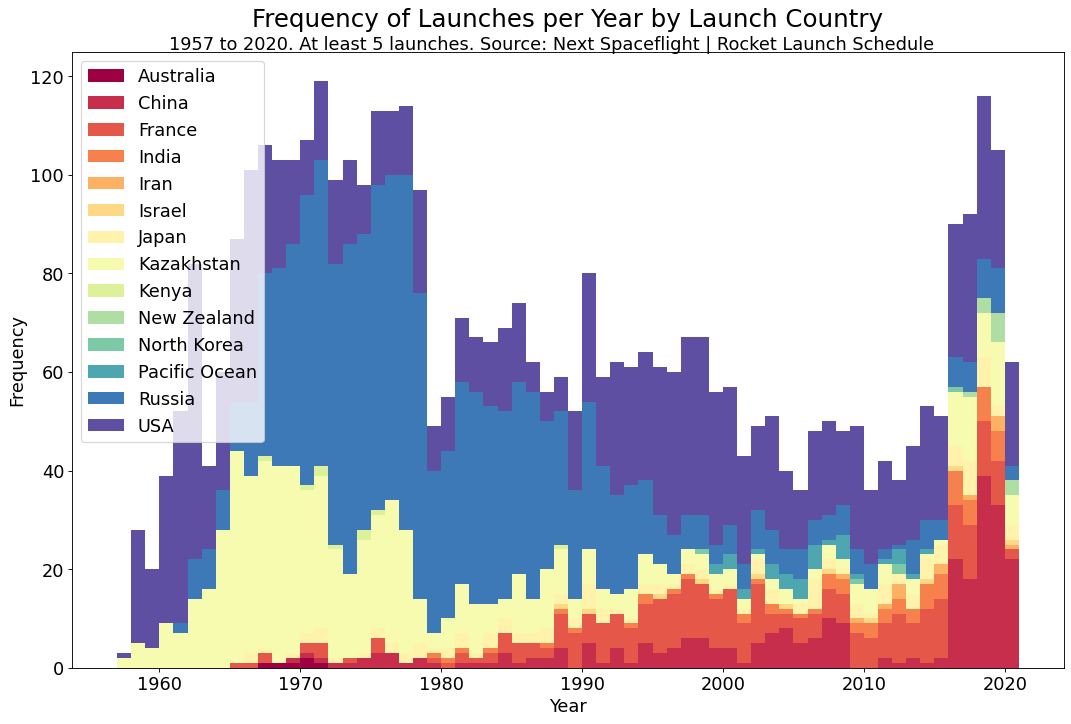

In [61]:
# Prepare data
x_var = 'Year'
groupby_var = 'Country'

# Filter for countries with at least 5 occurrences
country_counts = df[groupby_var].value_counts()
valid_countries = country_counts[country_counts >= 5].index
df_filtered = df[df[groupby_var].isin(valid_countries)]

df_agg = df_filtered.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(dpi=80)
colors = [plt.cm.Spectral(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(
    vals, bins=range(1957, 2020 + 2), stacked=True, density=False, color=colors[: len(vals)]
)

# Decoration
plt.legend(
    {group: col for group, col in zip(np.unique(df_filtered[groupby_var]).tolist(), colors[: len(vals)])}
)
plt.title("Frequency of Launches per Year by Launch Country", fontsize=22, y=1.03)
plt.suptitle("1957 to 2020. At least 5 launches. Source: Next Spaceflight | Rocket Launch Schedule", fontsize=16, y=0.90)  # Add 
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=range(1960, 2021, 10))
plt.show()